Імпортуємо усі необхідні бібліотеки:

In [5]:
from parallelized_functions.Matrix import Matrix
from parallelized_functions.ParMiniBatchGradientDescent import ParMiniBatchGradientDescent
import matplotlib.pyplot as plt
import pandas as pd

Виконуємо експеримент з кількістю вибірок у пакеті

In [6]:
if __name__ == '__main__':
    n_samples = 50000
    X = Matrix([[i * 2,
                 i + 5,
                 i - 10,
                 7 - i,
                 i * (-10)] for i in range(n_samples)])
    X, X_min, X_max = X.normalise()
    y = Matrix([[5 * X[i, 0] - 3 * X[i, 1] + 2 * X[i, 2] - X[i, 3] - 5 * X[i, 4] + 10] for i in range(n_samples)])
    y, y_min, y_max = y.normalise()

In [7]:
if __name__ == '__main__':
    batch_sizes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    iteration_time = []
    iteration_mse = []
    for i in range(3):
        time_lst = []
        mse_lst = []
        for batch_size in batch_sizes:
            num_iterations = 100
            par_descent = ParMiniBatchGradientDescent(X, y, learning_rate=0.4, num_iterations=num_iterations, batch_size=batch_size, num_processes=14, max_degree=1, stopping=1e-8)
            time = par_descent.optimize()
            y_pred = par_descent.predict()
            mse = (1 / n_samples) * ((y - y_pred) * (y - y_pred)).sum_elem()
            mse_lst.append(mse)
            time_lst.append(time)
        iteration_time.append(time_lst)
        iteration_mse.append(mse_lst)

Mini-Batch Gradient Descent Progress:
[============================================      ] 89%
Early Stopping on iteration 88

Executed in 76.246 seconds
Mini-Batch Gradient Descent Progress:
[============================================      ] 89%
Early Stopping on iteration 88

Executed in 60.478 seconds
Mini-Batch Gradient Descent Progress:
[============================================      ] 89%
Early Stopping on iteration 88

Executed in 25.069 seconds
Mini-Batch Gradient Descent Progress:
[============================================      ] 89%
Early Stopping on iteration 88

Executed in 18.054 seconds
Mini-Batch Gradient Descent Progress:
[============================================      ] 89%
Early Stopping on iteration 88

Executed in 12.401 seconds
Mini-Batch Gradient Descent Progress:
[=============================================     ] 90%
Early Stopping on iteration 89

Executed in 10.274 seconds
Mini-Batch Gradient Descent Progress:
[=====================================

Візуалізуємо дані про залежність часу від розміру міні-пакету на графіку:

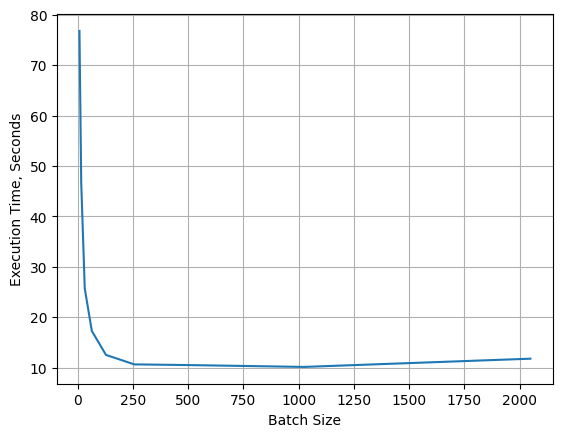

In [8]:
experiment_df = pd.DataFrame({'iter_one_time': iteration_time[0], 
                              'iter_two_time': iteration_time[1],
                              'iter_three_time': iteration_time[2],
                              'iter_one_mse': iteration_mse[0],
                              'iter_two_mse': iteration_mse[1],
                              'iter_three_mse': iteration_mse[2],
                              'batch_size': batch_sizes})
experiment_df['avg_time'] = (experiment_df['iter_one_time'] + experiment_df['iter_two_time'] + experiment_df['iter_three_time']) / 3
experiment_df['avg_mse'] = (experiment_df['iter_one_mse'] + experiment_df['iter_two_mse'] + experiment_df['iter_three_mse']) / 3
plt.plot(experiment_df['batch_size'], experiment_df['avg_time'])
plt.xlabel('Batch Size')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

Візуалізуємо дані про залежність середньквадратичної похибки на графіку:

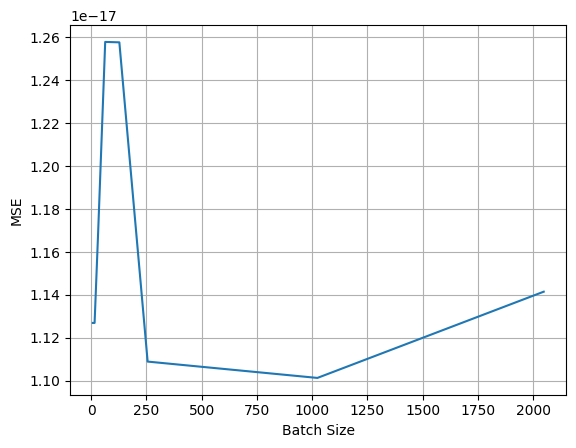

In [9]:
plt.plot(experiment_df['batch_size'], experiment_df['avg_mse'])
plt.xlabel('Batch Size')
plt.grid()
plt.ylabel('MSE')
plt.show()

Виводимо дані у таблиці:

In [10]:
experiment_df

,iter_one_time,iter_two_time,iter_three_time,iter_one_mse,iter_two_mse,iter_three_mse,batch_size,avg_time,avg_mse
0,76.246442,77.010089,77.235718,1.126982e-17,1.126982e-17,1.126982e-17,8,76.830750,1.126982e-17
1,60.477854,42.866919,36.815521,1.126982e-17,1.126982e-17,1.126982e-17,16,46.720098,1.126982e-17
2,25.069484,24.151656,27.898976,1.168949e-17,1.168949e-17,1.168949e-17,32,25.706705,1.168949e-17
3,18.053743,16.444316,17.340935,1.257746e-17,1.257746e-17,1.257746e-17,64,17.279665,1.257746e-17
4,12.400642,12.362712,12.826942,1.257553e-17,1.257553e-17,1.257553e-17,128,12.530099,1.257553e-17
5,10.273869,10.147541,11.530241,1.108988e-17,1.108988e-17,1.108988e-17,256,10.650550,1.108988e-17
6,10.707288,9.660846,11.148822,1.106446e-17,1.106446e-17,1.106446e-17,512,10.505652,1.106446e-17
7,9.606693,9.790903,11.039120,1.101386e-17,1.101386e-17,1.101386e-17,1024,10.145572,1.101386e-17
8,11.661306,11.245413,12.434126,1.141518e-17,1.141518e-17,1.141518e-17,2048,11.780282,1.141518e-17
